## Olist Brazilian E‑Commerce — Customer Retention & Value

### Project

This analysis uses the public Olist Brazilian E‑Commerce dataset to explore customer behaviour across orders, payments, reviews, products and sellers. I build customer‑level features (RFM: Recency, Frequency, Monetary) and review signals, define a churn flag, and benchmark models to predict churn risk. The goal: translate data into crisp, business‑ready actions for growth and retention. 

### Business Question

Which factors best predict customer churn and repeat purchase, and what actions should we prioritize to improve retention and revenue?

In [74]:
# wipes all variables, functions, and imports from memory
%reset -f

In [75]:
# Imports
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
DATA_DIR = r"D:\Brazilian E-Commerce Public Dataset by Olist" + "\\"

# Load CSVs (parse relevant dates)
orders   = pd.read_csv(DATA_DIR+"olist_orders_dataset.csv")
customers = pd.read_csv(DATA_DIR+"olist_customers_dataset.csv")
items    = pd.read_csv(DATA_DIR+"olist_order_items_dataset.csv")
payments = pd.read_csv(DATA_DIR+"olist_order_payments_dataset.csv")
reviews  = pd.read_csv(DATA_DIR+"olist_order_reviews_dataset.csv")
products = pd.read_csv(DATA_DIR+"olist_products_dataset.csv")
sellers  = pd.read_csv(DATA_DIR+"olist_sellers_dataset.csv")
cats     = pd.read_csv(DATA_DIR+"product_category_name_translation.csv")

# Quick shape & head checks
for name, df in dict(orders=orders, customers=customers, items=items, payments=payments, reviews=reviews, products=products, sellers=sellers).items():
    print(name, df.shape)


orders (99441, 8)
customers (99441, 5)
items (112650, 7)
payments (103886, 5)
reviews (99224, 7)
products (32951, 9)
sellers (3095, 4)


In [76]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [77]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [78]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [79]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [80]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [81]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [82]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [83]:
cats.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Data & Quality Checks
### Load core tables and run basic sanity checks (shapes, dtypes, nulls).

In [87]:
datasets = {
    "orders": orders,
    "customers": customers,
    "items": items,
    "payments": payments,
    "reviews": reviews,
    "products": products,
    "sellers": sellers,
    "cats": cats
}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    df.info()
    print("-"*50)   # separator so you can see them all


--- ORDERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
--------------------------------------------------

--- CUSTOMERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
D

In [88]:
# Correct data types

# Date conversions
orders["order_purchase_timestamp"]      = pd.to_datetime(orders["order_purchase_timestamp"], errors="coerce", utc=False)
orders["order_approved_at"]             = pd.to_datetime(orders["order_approved_at"], errors="coerce", utc=False)
orders["order_delivered_carrier_date"]  = pd.to_datetime(orders["order_delivered_carrier_date"], errors="coerce", utc=False)
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], errors="coerce", utc=False)
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], errors="coerce", utc=False)

items["shipping_limit_date"]            = pd.to_datetime(items["shipping_limit_date"], errors="coerce", utc=False)

reviews["review_creation_date"]         = pd.to_datetime(reviews["review_creation_date"], errors="coerce", utc=False)
reviews["review_answer_timestamp"]      = pd.to_datetime(reviews["review_answer_timestamp"], errors="coerce", utc=False)

# Zip codes to string
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str)
sellers["seller_zip_code_prefix"]     = sellers["seller_zip_code_prefix"].astype(str)

# Tidy product column names
products = products.rename(columns={
    "product_name_lenght": "product_name_length",
    "product_description_lenght": "product_description_length"
})


In [89]:
for name, df in {"orders":orders,"items":items,"reviews":reviews,"customers":customers,"sellers":sellers}.items():
    print(f"\n{name.upper()} dtypes:\n", df.dtypes.head(12))



ORDERS dtypes:
 order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

ITEMS dtypes:
 order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

REVIEWS dtypes:
 review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_times

## Churn rate analysis

In [90]:
# merge orders with customers to bring customer_unique_id
orders = orders.merge(customers, on="customer_id", how="left")

In [91]:
# group by customer_unique_id
last_purchase = orders.groupby("customer_unique_id")["order_purchase_timestamp"].max().reset_index()

In [92]:
# choose churn cutoff (e.g., 6 months before dataset max date)
cutoff_date = orders["order_purchase_timestamp"].max() - pd.DateOffset(months=6)

In [93]:
last_purchase["churned"] = (last_purchase["order_purchase_timestamp"] < cutoff_date).astype(int)

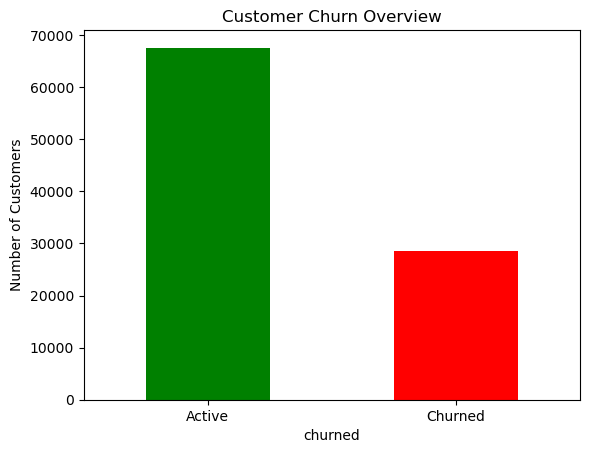

In [94]:
churn_counts = last_purchase["churned"].value_counts()
# plot
churn_counts.plot(kind="bar", color=["green","red"])
plt.xticks([0,1], ["Active","Churned"], rotation=0)
plt.title("Customer Churn Overview")
plt.ylabel("Number of Customers")
plt.show()


In [95]:
churn_rate = last_purchase["churned"].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 70.33%


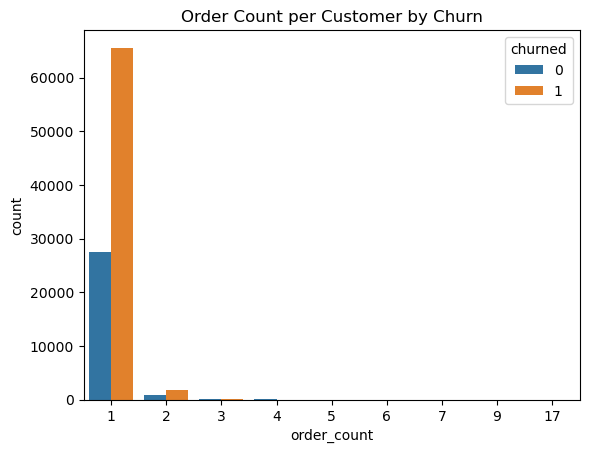

In [96]:

order_freq = orders.groupby("customer_unique_id")["order_id"].nunique().reset_index(name="order_count")

# add churn info to order_freq
order_freq = order_freq.merge(
    last_purchase[["customer_unique_id","churned"]],
    on="customer_unique_id",
    how="left"
)
# plot
sns.countplot(x="order_count", hue="churned", data=order_freq)
plt.title("Order Count per Customer by Churn")
plt.show()


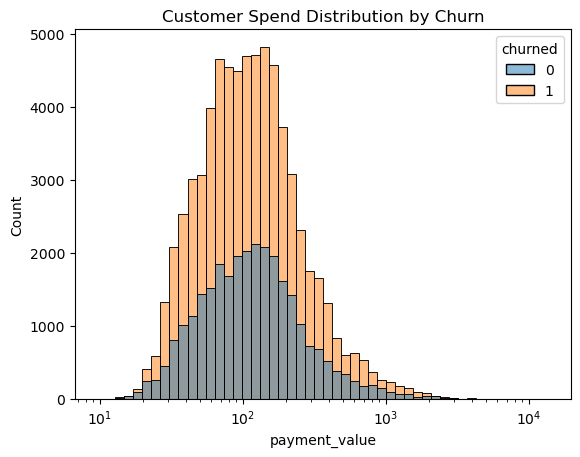

In [97]:
# total spend per order
order_spend = payments.groupby("order_id")["payment_value"].sum().reset_index()

# merge with orders (which already has customer_id + customer_unique_id)
order_spend = order_spend.merge(orders[["order_id","customer_unique_id"]], on="order_id", how="left")

# aggregate spend per customer
customer_spend = order_spend.groupby("customer_unique_id")["payment_value"].sum().reset_index()

# add churn flag
customer_spend = customer_spend.merge(last_purchase[["customer_unique_id","churned"]], on="customer_unique_id", how="left")

# plot
sns.histplot(data=customer_spend, x="payment_value", hue="churned", bins=50, log_scale=True)
plt.title("Customer Spend Distribution by Churn")
plt.show()




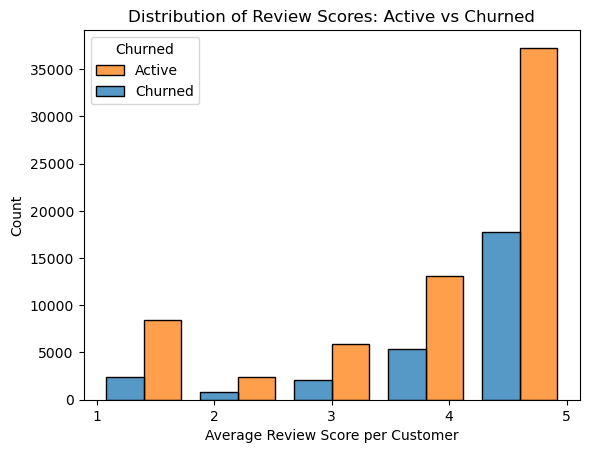

In [98]:
# average review per order
order_reviews = reviews.groupby("order_id")["review_score"].mean().reset_index()

# merge with orders (already merged with customers, so it has customer_unique_id)
order_reviews = order_reviews.merge(orders[["order_id","customer_unique_id"]], on="order_id", how="left")

# aggregate average review per customer
customer_reviews = order_reviews.groupby("customer_unique_id")["review_score"].mean().reset_index()

# add churn flag
customer_reviews = customer_reviews.merge(last_purchase[["customer_unique_id","churned"]], on="customer_unique_id", how="left")

# plot
sns.histplot(
    data=customer_reviews,
    x="review_score",
    hue="churned",
    multiple="dodge",   # separate bars for active vs churned
    bins=5,             # review scores are 1–5
    shrink=0.8
)
plt.xticks([1,2,3,4,5])
plt.xlabel("Average Review Score per Customer")
plt.title("Distribution of Review Scores: Active vs Churned")
plt.legend(title="Churned", labels=["Active","Churned"])
plt.show()



churned         1.00
recency_days    0.72
monetary       -0.01
order_count    -0.02
avg_review     -0.07
Name: churned, dtype: float64


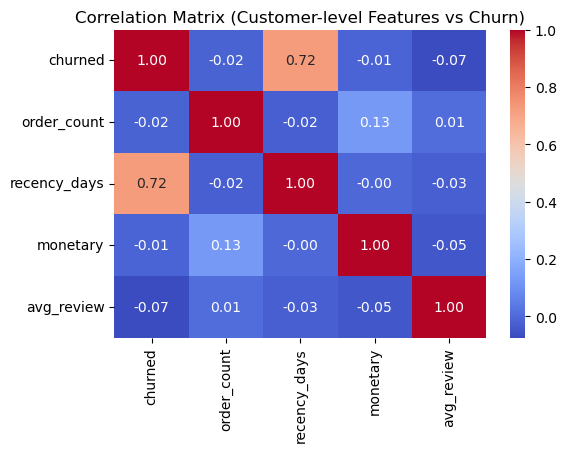

In [99]:
# Frequency (number of orders per customer) ---
freq = orders.groupby("customer_unique_id")["order_id"].nunique().reset_index(name="order_count")

# Recency (days since last purchase) ---
last_order = orders.groupby("customer_unique_id")["order_purchase_timestamp"].max().reset_index()
last_order["recency_days"] = (orders["order_purchase_timestamp"].max() - last_order["order_purchase_timestamp"]).dt.days
recency = last_order[["customer_unique_id","recency_days"]]

# Monetary (total spend per customer) ---
order_spend = payments.groupby("order_id")["payment_value"].sum().reset_index()
monetary = order_spend.merge(orders[["order_id","customer_unique_id"]], on="order_id", how="left") \
                      .groupby("customer_unique_id")["payment_value"].sum().reset_index(name="monetary")

# Average review score per customer ---
order_reviews = reviews.groupby("order_id")["review_score"].mean().reset_index()
avg_review = order_reviews.merge(orders[["order_id","customer_unique_id"]], on="order_id", how="left") \
                          .groupby("customer_unique_id")["review_score"].mean().reset_index(name="avg_review")

# Assemble everything together with churn flag ---
X = (last_purchase[["customer_unique_id","churned"]]  # your churn flag
     .merge(freq, on="customer_unique_id", how="left")
     .merge(recency, on="customer_unique_id", how="left")
     .merge(monetary, on="customer_unique_id", how="left")
     .merge(avg_review, on="customer_unique_id", how="left"))

# Correlation matrix
corr = X.corr(numeric_only=True)
print(corr["churned"].sort_values(ascending=False))

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Customer-level Features vs Churn)")
plt.show()


In [100]:
from scipy.stats import mannwhitneyu

active_reviews = customer_reviews[customer_reviews["churned"]==0]["review_score"].dropna()
churned_reviews = customer_reviews[customer_reviews["churned"]==1]["review_score"].dropna()

stat, p = mannwhitneyu(active_reviews, churned_reviews, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p:.4f}")


Mann-Whitney U test: U=1027097005.0, p=0.0000


In [101]:
active_freq = order_freq[order_freq["churned"]==0]["order_count"]
churned_freq = order_freq[order_freq["churned"]==1]["order_count"]

stat, p = mannwhitneyu(active_freq, churned_freq, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p:.4f}")


Mann-Whitney U test: U=968518111.5, p=0.0000


In [102]:
active_spend = customer_spend[customer_spend["churned"]==0]["payment_value"]
churned_spend = customer_spend[customer_spend["churned"]==1]["payment_value"]

stat, p = mannwhitneyu(active_spend, churned_spend, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p:.4f}")


Mann-Whitney U test: U=981825656.0, p=0.0000


## Sensitivity Analysis

   cutoff_months  churn_rate_%
0              3         89.64
1              6         70.33
2              9         49.11
3             12         29.71


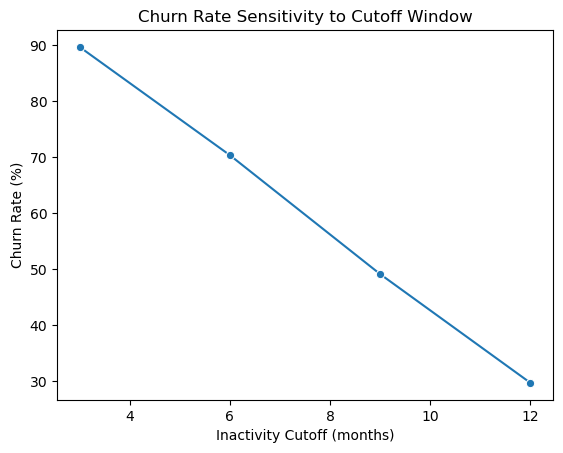

In [103]:
 # function calculating customer churn rates based on different inactivity cutoff windows
def churn_rate_by_cutoff(orders, months_list=[3,6,9]):
    max_date = orders["order_purchase_timestamp"].max()
    results = []

    for m in months_list:
        cutoff_date = max_date - pd.DateOffset(months=m)

        # churn flag for this cutoff
        last_purchase = orders.groupby("customer_unique_id")["order_purchase_timestamp"].max().reset_index()
        last_purchase["churned"] = (last_purchase["order_purchase_timestamp"] < cutoff_date).astype(int)

        churn_rate = last_purchase["churned"].mean() * 100
        results.append({"cutoff_months": m, "churn_rate_%": churn_rate})

    return pd.DataFrame(results)

# run it
sensitivity = churn_rate_by_cutoff(orders, months_list=[3,6,9,12])
print(sensitivity)

# plot
sns.lineplot(data=sensitivity, x="cutoff_months", y="churn_rate_%", marker="o")
plt.title("Churn Rate Sensitivity to Cutoff Window")
plt.xlabel("Inactivity Cutoff (months)")
plt.ylabel("Churn Rate (%)")
plt.show()


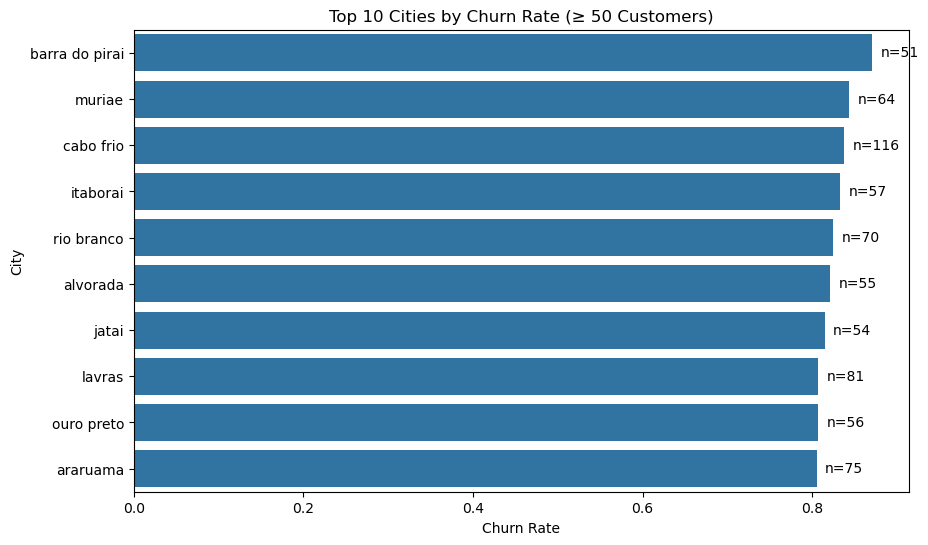

In [104]:
# Add churn info to customers
customer_churn = customers.merge(last_purchase[["customer_unique_id","churned"]],
                                 on="customer_unique_id", how="left")

# Group by city
churn_by_city = (customer_churn.groupby("customer_city")
                 .agg(churn_rate=("churned","mean"),
                      num_customers=("customer_unique_id","nunique"))
                 .reset_index())

# Filter: only cities with at least 50 customers
churn_by_city = churn_by_city[churn_by_city["num_customers"] >= 50]

# Top 10 by churn rate
top_cities = churn_by_city.sort_values("churn_rate", ascending=False).head(10)

# Plot

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x="churn_rate", y="customer_city")
for i, (rate, n) in enumerate(zip(top_cities["churn_rate"], top_cities["num_customers"])):
    plt.text(rate+0.01, i, f"n={n}", va="center")
plt.title("Top 10 Cities by Churn Rate (≥ 50 Customers)")
plt.xlabel("Churn Rate")
plt.ylabel("City")
plt.show()


## Modeling

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

features = ["order_count","monetary","avg_review"]

# Fill NaNs
X_fixed = X.copy()
X_fixed[features] = X_fixed[features].fillna({
    "order_count": 0,
    "monetary": 0,
    "avg_review": X_fixed["avg_review"].median()
})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_fixed[features], X_fixed["churned"], 
    test_size=0.3, random_state=42, stratify=X_fixed["churned"]
)

# 1. Logistic Regression (baseline) ---
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

print("Logistic Regression Results")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print(classification_report(y_test, y_pred_log))

coeffs = pd.DataFrame({"feature": features, "coef": log_model.coef_[0]})
coeffs["odds_ratio"] = coeffs["coef"].apply(lambda x: round(np.exp(x), 2))
print("\nLogistic Regression Coefficients & Odds Ratios")
print(coeffs)


# 2. Random Forest (baseline) ---
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n Random Forest Results")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

# Feature importances
feat_imp = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
feat_imp = feat_imp.sort_values("importance", ascending=False)
print("\nRandom Forest Feature Importances")
print(feat_imp)


Logistic Regression Results
ROC-AUC: 0.5427457018276842
              precision    recall  f1-score   support

           0       0.32      0.64      0.42      8555
           1       0.73      0.42      0.54     20274

    accuracy                           0.49     28829
   macro avg       0.53      0.53      0.48     28829
weighted avg       0.61      0.49      0.50     28829


Logistic Regression Coefficients & Odds Ratios
       feature  coef  odds_ratio
0  order_count -0.13        0.88
1     monetary -0.00        1.00
2   avg_review -0.13        0.88

 Random Forest Results
ROC-AUC: 0.7040133283311444
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      8555
           1       0.79      0.78      0.78     20274

    accuracy                           0.70     28829
   macro avg       0.65      0.65      0.65     28829
weighted avg       0.71      0.70      0.70     28829


Random Forest Feature Importances
       feature  importa

## Key Insights (EN)

 - Churn is high under a 6-month inactivity rule: ~70.3% of customers are labeled churned in the snapshot (definition: no purchase in the 6 months before the dataset’s max date).
 - Recency is the strongest raw signal: correlation of +0.72 between days since last purchase and churn—every extra day without a purchase pushes risk up.
 - Spend (Monetary) matters for prediction: in the baseline Random Forest, Monetary dominates feature importance, indicating high-value customers behave differently around churn.
 - Frequency & sentiment help: more orders and higher average review score are (modestly) protective—negative logit coefficients (odds ratios ~0.88). The distributional test also shows churners order less (Mann-Whitney p≈0.0000).
 - Model performance (baseline): Random Forest AUC ≈ 0.70 (accuracy ≈ 0.70) vs. Logistic AUC ≈ 0.54—non-linear patterns help; use RF as the starting score.

## Wichtige Erkenntnisse (DE)

- Hoher Churn bei 6-Monats-Inaktivität: ca. 70,3 % der Kund:innen gelten im Snapshot als abgewandert (Definition: kein Kauf in den letzten 6 Monaten bis zum Maximaldatum des Datensatzes).

- Recency ist der stärkste Roh-Indikator: Korrelation +0,72 zwischen Tagen seit dem letzten Kauf und Churn – jeder zusätzliche Tag ohne Kauf erhöht das Risiko.

- Ausgaben (Monetary) sind entscheidend für die Vorhersage: Im baseline Random-Forest dominiert Monetary die Feature-Importance – höherwertige Kund:innen verhalten sich beim Churn anders.

- Frequenz & Stimmung helfen: Mehr Bestellungen und höhere durchschnittliche Bewertungen wirken (moderat) protektiv – negative Logit-Koeffizienten (Odds Ratio ~0,88). Verteilungsvergleich zeigt zudem: Churner bestellen signifikant seltener (Mann-Whitney p ≈ 0,0000).

- Modellgüte (Baseline): Random Forest AUC ≈ 0,70 (Accuracy ≈ 0,70) vs. Logistische Regression AUC ≈ 0,54 – nichtlineare Muster helfen; den RF als Start-Score verwenden.